El grafo se puede colorear con 2 colores:
  Nodo A: Color 1
  Nodo B: Color 2
  Nodo C: Color 2
  Nodo D: Color 1


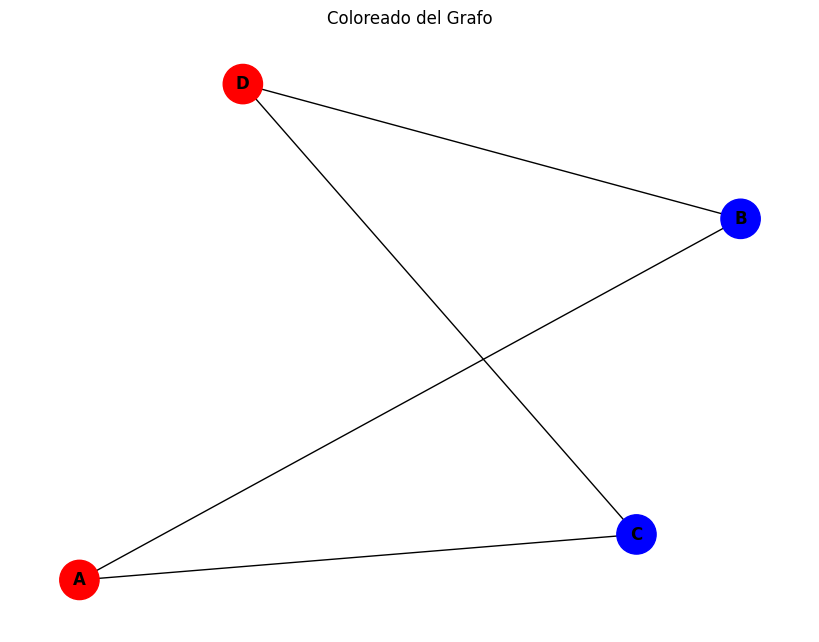

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def es_valido_colorear(grafo, colores, nodo, color):
    """
    Verifica si es válido asignar un color a un nodo.
    Args:
        grafo (dict): Diccionario de adyacencias del grafo.
        colores (dict): Colores asignados a los nodos.
        nodo (str): Nodo actual a colorear.
        color (int): Color a verificar.
    Returns:
        bool: True si es válido, False si no.
    """
    for vecino in grafo[nodo]:
        if colores[vecino] == color:
            return False
    return True


def colorear_grafo(grafo, k, colores, nodos, idx=0):
    """
    Intenta colorear el grafo utilizando k colores.
    Args:
        grafo (dict): Diccionario de adyacencias del grafo.
        k (int): Número máximo de colores.
        colores (dict): Colores asignados a los nodos.
        nodos (list): Lista de nodos.
        idx (int): Índice del nodo actual.
    Returns:
        bool: True si se puede colorear, False si no.
    """
    if idx == len(nodos):  # Caso base: todos los nodos están coloreados
        return True

    nodo = nodos[idx]
    for color in range(1, k + 1):
        if es_valido_colorear(grafo, colores, nodo, color):
            colores[nodo] = color
            if colorear_grafo(grafo, k, colores, nodos, idx + 1):
                return True
            colores[nodo] = 0  # Backtracking

    return False


def resolver_coloreado_grafo(grafo, k):
    """
    Resuelve el problema de Coloreado de Grafos.
    Args:
        grafo (dict): Diccionario de adyacencias del grafo.
        k (int): Número máximo de colores.
    Returns:
        dict or None: Diccionario de colores asignados o None si no es posible.
    """
    colores = {nodo: 0 for nodo in grafo}
    nodos = list(grafo.keys())
    if colorear_grafo(grafo, k, colores, nodos):
        return colores
    return None


def dibujar_grafo_coloreado(grafo, colores):
    """
    Dibuja el grafo coloreado con colores bien diferenciados.
    Args:
        grafo (dict): Diccionario de adyacencias del grafo.
        colores (dict): Diccionario con los colores asignados a los nodos.
    """
    # Paleta de colores personalizada
    color_palette = {
        1: "red",
        2: "blue",
        3: "green",
        4: "yellow",
        5: "purple",
        6: "orange",
        7: "pink",
        8: "brown",
        9: "gray",
    }

    G = nx.Graph()
    for nodo, vecinos in grafo.items():
        for vecino in vecinos:
            G.add_edge(nodo, vecino)

    # Asignar colores usando la paleta personalizada
    color_map = [color_palette[colores[nodo]] for nodo in G.nodes()]
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))
    nx.draw(
        G, pos, with_labels=True, node_color=color_map, node_size=800, font_weight="bold"
    )
    plt.title("Coloreado del Grafo")
    plt.show()


# Ejemplo de grafo como diccionario de adyacencias
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C']
}

k = 2  # Intentar con 2 colores
resultado = resolver_coloreado_grafo(grafo, k)

if resultado:
    print(f"El grafo se puede colorear con {k} colores:")
    for nodo, color in resultado.items():
        print(f"  Nodo {nodo}: Color {color}")
    dibujar_grafo_coloreado(grafo, resultado)
else:
    print(f"No es posible colorear el grafo con {k} colores.")

